In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import numpy as np
import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt

In [3]:
from model_eval import plot_CM_chirp_line

In [16]:
vocab = ['1080Lines',
 '1400Ripples',
 'Air_Compressor',
 'Blip',
 'Chirp',
 'Extremely_Loud',
 'Helix',
 'Koi_Fish',
 'Light_Modulation',
 'Low_Frequency_Burst',
 'Low_Frequency_Lines',
 'No_Glitch',
 'None_of_the_Above',
 'Paired_Doves',
 'Power_Line',
 'Repeating_Blips',
 'Scattered_Light',
 'Scratchy',
 'Tomte',
 'Violin_Mode',
 'Wandering_Line',
 'Whistle']

### GravitySpy confusion matrix

In [102]:
cm = np.array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.89, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.1 , 0.9 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.96, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.95, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.97, 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.  , 0.08, 0.69, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.07, 0.  , 0.  , 0.  , 0.02, 0.05, 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.83, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.94, 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.97, 0.  , 0.01],
       [0.14, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.57, 0.14],
       [0.  , 0.02, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.87]])

In [107]:
def plot_CM_PR_Samuel(cm, vocab, figsize=(10, 10)):
    """Plot confusion matrix with precision and recall for each class at the bottom,"""           
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(2, 1, height_ratios=[9, 1])

    ax0 = plt.subplot(gs[0])
    plt.imshow(cm, interpolation="nearest", cmap="Blues", aspect=0.85)
    tick_marks = np.arange(len(vocab))
    plt.xticks(tick_marks, vocab, rotation=45, ha="left", fontsize="large")
    plt.yticks(tick_marks, vocab, fontsize="large")

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if cm[i, j] >= 0.005:
            coeff = f"{cm[i, j]:.2f}"
            plt.text(
                j,
                i,
                coeff,
                horizontalalignment="center",
                verticalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )
    ax = plt.gca()
    ax.tick_params(axis="x", length=0, top=True, bottom=False, labeltop=True, labelbottom=False)
    ax.yaxis.set_tick_params(length=0)
    ax.yaxis.set_label_position("right")
    plt.ylabel("Actual Class", labelpad=10, fontsize="x-large")

    ax1 = plt.subplot(gs[1])
    true_pos = np.diag(cm)
    false_pos = np.sum(cm, axis=0) - true_pos
    false_neg = np.sum(cm, axis=1) - true_pos

    prec = true_pos / (true_pos + false_pos)
    rec = true_pos / (true_pos + false_neg)
    pr = np.vstack((rec, prec))
    x_vocab = vocab
    y_vocab = ["Recall", "Precision"]
    plt.imshow(pr, interpolation="nearest", cmap="Blues", vmin=0, vmax=1, aspect=1)
    x_tick_marks = np.arange(len(x_vocab))
    y_tick_marks = np.arange(len(y_vocab))
    plt.yticks(y_tick_marks, y_vocab, fontsize="large")
    thresh = pr.max() / 2.0
    for i, j in itertools.product(range(pr.shape[0]), range(pr.shape[1])):
        if pr[i, j] >= 0.005:
            coeff = f"{pr[i, j]:.2f}"
            plt.text(
                j,
                i,
                coeff,
                horizontalalignment="center",
                verticalalignment="center",
                color="white" if pr[i, j] > thresh else "black",
                weight="bold",
                size=9.5,
            )
    ax = plt.gca()
    ax.tick_params(axis="x", length=0, top=False, bottom=False, labeltop=False, labelbottom=False)
    ax.yaxis.set_tick_params(length=0)
    plt.xlabel("Predicted Class", labelpad=10, fontsize="x-large")
    plt.grid(False)
    plt.subplots_adjust(wspace=0, hspace=0)

    return fig, [ax0, ax1]

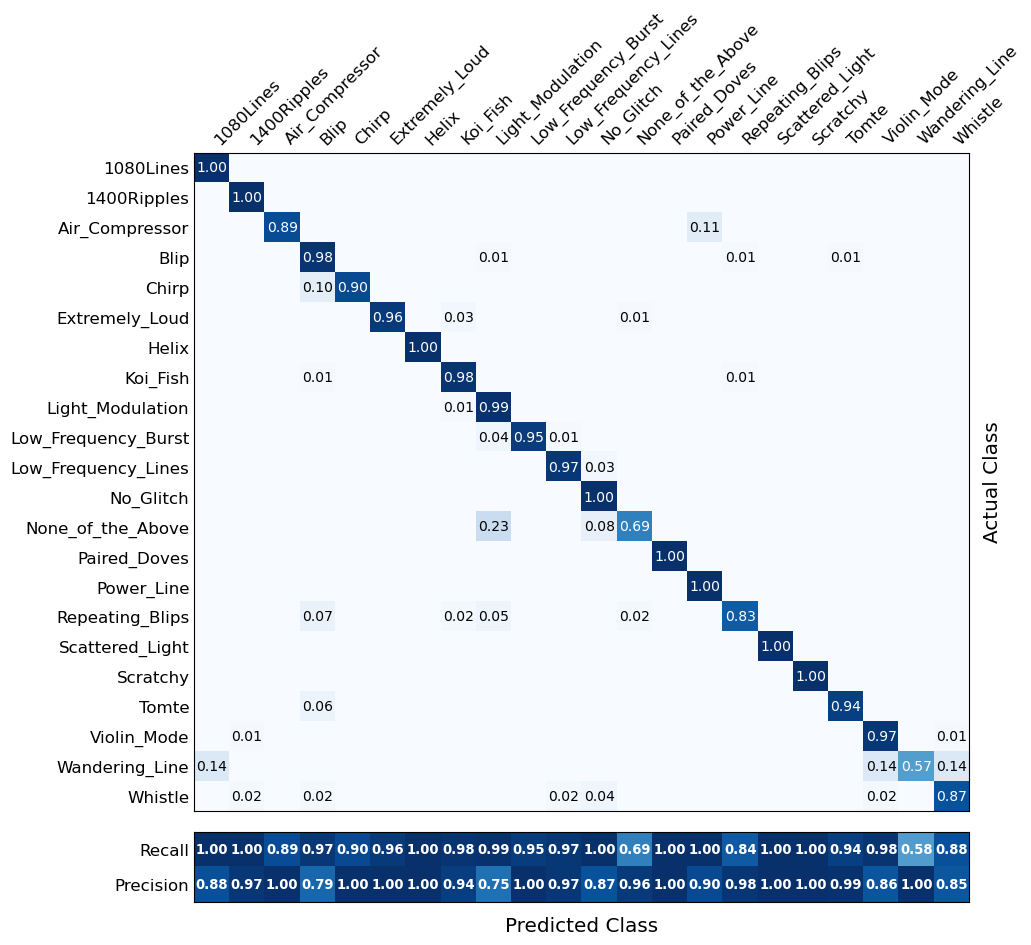

In [109]:
fig, axes = plot_CM_PR_Samuel(cm, vocab=vocab)
fig.savefig("../figs/glitches/22_ssl_cm_2.pdf", dpi=600, bbox_inches="tight")

### Pre-training matrix

In [4]:
cm = np.array([[0.89, 0.01, 0.  , 0.  , 0.  , 0.1, 0.  ],
 [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
 [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
 [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
 [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
 [0.13, 0.  , 0.  , 0.  , 0.  , 0.87, 0.  ],
 [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

In [5]:
pretrain_vocab = ['noAugmentation', 'crop', 'rotate90', 'rotate270', 'flipVertical', 'flipHorizontal', 'colorize']

In [6]:
def plot_CM_Samuel(cm, vocab, figsize=(10, 10)):
    """Plot confusion matrix for the pretraining step."""           
    fig = plt.figure(figsize=figsize)
    ax0 = fig.gca()
    plt.imshow(cm, interpolation="nearest", cmap="Blues", aspect=1)
    tick_marks = np.arange(len(vocab))
    plt.xticks(tick_marks, vocab, rotation=45, ha="left", fontsize="large")
    plt.yticks(tick_marks, vocab, fontsize="large")

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if cm[i, j] >= 0.005:
            coeff = f"{cm[i, j]:.2f}"
            plt.text(
                j,
                i,
                coeff,
                horizontalalignment="center",
                verticalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )
    ax = plt.gca()
    ax.tick_params(axis="x", length=0, top=True, bottom=False, labeltop=True, labelbottom=False)
    ax.yaxis.set_tick_params(length=0)
    ax.yaxis.set_label_position("right")
    plt.ylabel("Actual Class", labelpad=10, fontsize="x-large")
 
    plt.xlabel("Predicted Class", labelpad=10, fontsize="x-large")
    plt.grid(False)
    plt.subplots_adjust(wspace=0, hspace=0)

    return fig, ax

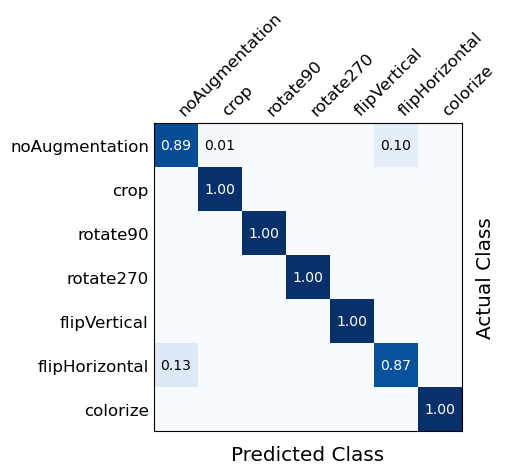

In [7]:
fig, axes = plot_CM_Samuel(cm, vocab=pretrain_vocab, figsize=(5, 4))
fig.savefig("../figs/glitches/22_ssl_cm_1.pdf", dpi=600, bbox_inches="tight")

### O3 GWs

In [15]:
chirp_line = [ 0,  0,  3, 28,  6,  0,  0,  0,  0,  0,  1,  5,  1,  0,  0,  5,  0,  0,  1,  0,  0,  0]
cm = np.zeros((22, 22), dtype=int)
cm[4, :] = chirp_line

In [25]:
recall = chirp_line[4] / sum(chirp_line)
recall

0.12

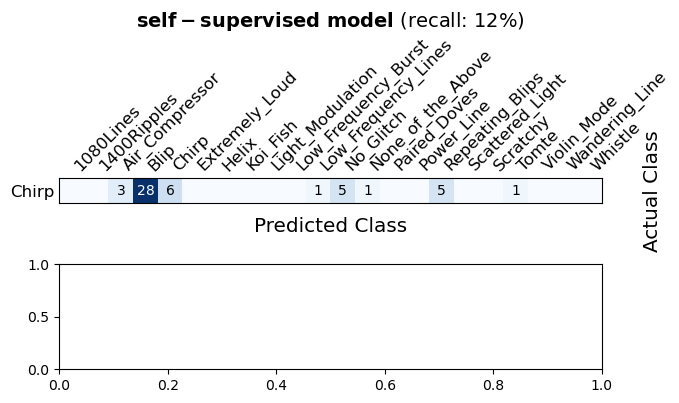

In [87]:
fig, axs = plt.subplots(2, 1, figsize=(7, 3))
axs[0] = plot_CM_chirp_line(axs[0], cm, vocab=vocab, normalize=False)
axs[0].set_title("$\mathbf{self-supervised\ model}$ (recall: 12%)", fontsize=14);

bbox = matplotlib.transforms.Bbox.from_extents(0,1.45,7,4)

fig.savefig('../figs/glitches/22_ssl_o3gws.pdf', dpi=600, bbox_inches=bbox)